In [1]:
import pandas as pd
import random as rd
import numpy as np
import copy
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import collections
from collections import deque  # Add this import

!which python

/Users/berat/Desktop/quantum_entanglement/.venv/bin/python


In [26]:
class QuantumNetwork:
    def __init__(self, initialEdges, pGen, cutOffAge, maxLinks):
        self.initialEdges = initialEdges
        self.currentEdges = {} 
        self.pGen = pGen
        self.cutOffAge = cutOffAge
        self.maxLinks = maxLinks
    
    def reset(self):
        self.currentEdges = {}
    
    def getState(self):
        return self.currentEdges
    
    def generateGlobalEntanglements(self):
        for edge in self.initialEdges:
            if rd.random() < self.pGen:
                self.generateLocalEntanglements(*edge)
    
    def generateLocalEntanglements(self, node1, node2):
        edge = tuple(sorted([node1, node2]))
        if edge not in self.currentEdges:
            self.currentEdges[edge] = deque([0])
        else:
            if len(self.currentEdges[edge]) < self.maxLinks:
                self.currentEdges[edge].appendleft(0) # Retain order by age
    
    def discardEntanglement(self, edge: tuple):
        if edge in self.currentEdges and len(self.currentEdges[edge]) > 0: # Should never be the case that these aren't the same
            self.currentEdges[edge].pop() # Remove oldest entanglement
        if len(self.currentEdges[edge]) == 0:
            del self.currentEdges[edge]

    def increaseGlobalEntanglementAge(self):
        edges_to_remove = []
        for edge in self.currentEdges:
            newAges = [age + 1 for age in self.currentEdges[edge] if age < self.cutOffAge]
            self.currentEdges[edge] = deque(newAges)
            if len(self.currentEdges[edge]) == 0:
                edges_to_remove.append(edge)
        # Remove edges with empty deques
        for edge in edges_to_remove:
            del self.currentEdges[edge]

In [95]:
class WaitingNetwork(QuantumNetwork):
    def __init__(self, initialEdges, pGen, cutOffAge, maxLinks, goalStates):
        super().__init__(initialEdges, pGen, cutOffAge, maxLinks)
        self.goalStates = goalStates

    def isTerminal(self, desiredStates=None):
        # Create an undirected graph from current edges to check connectivity
        G = nx.Graph()
        G.add_edges_from(self.currentEdges)
        
        # Use desiredState if provided, otherwise use self.goalState
        states_to_check = desiredStates if desiredStates is not None else self.goalStates
        
        # For each desired connection in states_to_check
        for start, end in states_to_check:
            # Check if there's a path between start and end nodes
            if not nx.has_path(G, start, end):
                return False
        
        # If we can reach all desired connections, return True
        return True

    def chooseAction(self):
        pass
        

    def drawState(self):
        plt.clf()  # Clear the current figure, else they overlap
        G = nx.Graph()
        
        # Add all nodes from initial edges
        nodes = set()
        for edge in self.initialEdges:
            nodes.add(edge[0])
            nodes.add(edge[1])
        G.add_nodes_from(nodes)
        G.add_edges_from(self.initialEdges)
        
        pos = nx.spring_layout(G, seed=27) # different from random seed
        
        # pos = nx.shell_layout(G)
        # pos = nx.circular_layout(G)
        
        # Draw initial edges (potential connections) in grey dashed lines
        nx.draw_networkx_edges(G, pos=pos, 
                            edgelist=self.initialEdges,
                            edge_color='grey',
                            style='dashed',
                            alpha=0.5)
        
        # Draw current entanglements in blue solid lines
        nx.draw_networkx_edges(G, pos=pos,
                            edgelist=self.currentEdges.keys(),
                            edge_color='blue',
                            width=2)
        
        # Draw nodes
        nx.draw_networkx_nodes(G, pos=pos, node_color='lightblue')
        nx.draw_networkx_labels(G, pos=pos)
        
        # Add edge labels for number of entanglements (will always be one in this case)
        edge_labels = {edge: len(ages) for edge, ages in self.currentEdges.items()}
        nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)

None
False


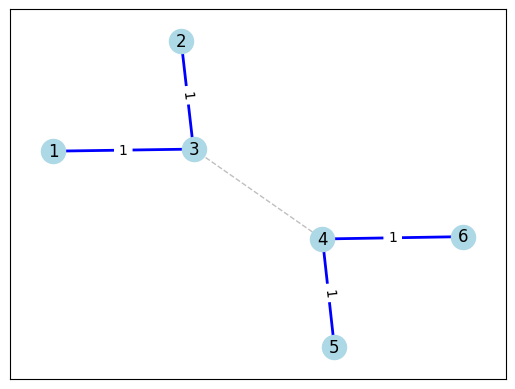

In [101]:
initialEdges = [(1,3), (2,3), (3,4), (4,5), (4,6)]
goalStates = [(1, 5)]
pGen = 0.8
cutOffAge = 1 # For this basic example
maxLinks = 1 # For this basic example
rd.seed(27)
network = WaitingNetwork(initialEdges, pGen, cutOffAge, maxLinks, goalStates)
network.getState()
network.generateGlobalEntanglements()

print(network.drawState())
print(network.isTerminal())